<h1>Final Project Milestone 5</h1>

# CSV Data

In [47]:
#libraries
import pandas as pd
import numpy as np

### 1. Format data into a more readable format - Dataframe is a great choice which works well with CSV files.

In [2]:
#load CSV file into DF
df=pd.read_csv("vaccinations.csv")

In [3]:
df.head(5)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0


### 2. Find missing/null values

In [4]:
for c in df.columns:
    miss = df[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))

location has no missing values
iso_code has no missing values
date has no missing values
total_vaccinations has 18225 missing value(s)
people_vaccinated has 19207 missing value(s)
people_fully_vaccinated has 22281 missing value(s)
total_boosters has 42926 missing value(s)
daily_vaccinations_raw has 22228 missing value(s)
daily_vaccinations has 267 missing value(s)
total_vaccinations_per_hundred has 18225 missing value(s)
people_vaccinated_per_hundred has 19207 missing value(s)
people_fully_vaccinated_per_hundred has 22281 missing value(s)
total_boosters_per_hundred has 42926 missing value(s)
daily_vaccinations_per_million has 267 missing value(s)


### 3. Create a subset of data to work with that doesn't have a lot of missing values.  This produces a higher quality dattaset which can be joined with other data sources.

In [5]:
df_narrow = df[['location', 'iso_code', 'date', 'daily_vaccinations', 'daily_vaccinations_per_million']]

### 4. Fill missing values with fillna using the fill backward method for daily_vaccinations and daily_vaccinations_per_million given it is a small number and daily numbers likely don't have huge swings.  To save a step, we can include the other columns which have no null values since they won't be affected

In [6]:
df_narrow = df_narrow[['location', 'iso_code', 'date', 'daily_vaccinations', 'daily_vaccinations_per_million']].fillna(method='bfill')

In [7]:
#check if null values are fixed
for c in df_narrow.columns:
    miss = df_narrow[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))

location has no missing values
iso_code has no missing values
date has no missing values
daily_vaccinations has no missing values
daily_vaccinations_per_million has no missing values


### 5. Replace headers - to make the country and ISO codes easier to read, their names will be changed. 

In [8]:
df_narrow = df_narrow.rename(columns={'location': 'country', 'iso_code': 'country_iso_code'})

In [9]:
df_narrow.columns

Index(['country', 'country_iso_code', 'date', 'daily_vaccinations',
       'daily_vaccinations_per_million'],
      dtype='object')

### 6. Check for unique values in country and iso_code columns

In [10]:
np.unique(df_narrow['country'])

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe',
 

In [11]:
df_narrow['country'].nunique()

234

In [12]:
np.unique(df_narrow['country_iso_code'])

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BEL', 'BEN', 'BES', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN',
       'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FLK', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB',
       'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUY',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO',
       'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX',
       'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD',
       'MLI', 'MLT',

In [13]:
df_narrow['country_iso_code'].nunique()

234

The total counts match, however it will be noted for future joining that there are some countries which appear to be combined, such as "Bosnia and Herzegovina".  

### 7. Fix casing values - To ensure casing remains consistent across data sources, the names of the countries will be changed to uppercase. 

In [14]:
df_narrow['country'] = df_narrow['country'].str.upper()

In [15]:
#check if fix was applied
df_narrow.head(5)

,country,country_iso_code,date,daily_vaccinations,daily_vaccinations_per_million
0,AFGHANISTAN,AFG,2021-02-22,1367.0,34.0
1,AFGHANISTAN,AFG,2021-02-23,1367.0,34.0
2,AFGHANISTAN,AFG,2021-02-24,1367.0,34.0
3,AFGHANISTAN,AFG,2021-02-25,1367.0,34.0
4,AFGHANISTAN,AFG,2021-02-26,1367.0,34.0


### 8. Grouping - To collect some statistics and totals based on country, a subset of data grouped by country will be examined

In [16]:
df_country = df_narrow[['country','daily_vaccinations','daily_vaccinations_per_million']].groupby('country')

In [17]:
df_country.head(5)

,country,daily_vaccinations,daily_vaccinations_per_million
0,AFGHANISTAN,1367.0,34.0
1,AFGHANISTAN,1367.0,34.0
2,AFGHANISTAN,1367.0,34.0
3,AFGHANISTAN,1367.0,34.0
4,AFGHANISTAN,1367.0,34.0
...,...,...,...
43247,ZIMBABWE,425.0,28.0
43248,ZIMBABWE,425.0,28.0
43249,ZIMBABWE,425.0,28.0
43250,ZIMBABWE,425.0,28.0


In [18]:
df_country.sum()

,daily_vaccinations,daily_vaccinations_per_million
country,,
AFGHANISTAN,1.723727e+06,43262.0
AFRICA,9.500188e+07,69158.0
ALBANIA,1.397794e+06,486530.0
ALGERIA,4.084398e+06,91481.0
ANDORRA,9.020100e+04,1166077.0
...,...,...
WALLIS AND FUTUNA,9.412000e+03,848389.0
WORLD,5.093317e+09,646769.0
YEMEN,3.072190e+05,10076.0


In [19]:
df_country.describe()

daily_vaccinations                                      \
                               count          mean           std     min   
country                                                                    
AFGHANISTAN                    171.0  1.008027e+04  9.175217e+03  1367.0   
AFRICA                         232.0  4.094909e+05  3.491640e+05   500.0   
ALBANIA                        230.0  6.077365e+03  4.561305e+03     0.0   
ALGERIA                        204.0  2.002156e+04  6.150886e+03    30.0   
ANDORRA                        203.0  4.443399e+02  4.286459e+02    28.0   
...                              ...           ...           ...     ...   
WALLIS AND FUTUNA              154.0  6.111688e+01  8.505815e+01     4.0   
WORLD                          270.0  1.886414e+07  1.457323e+07     0.0   
YEMEN                           80.0  3.840238e+03  2.569181e+03   939.0   
ZAMBIA                         137.0  4.092971e+03  3.908839e+03    51.0   
ZIMBABWE                       192.0  2.064950e+04  2.033262e+04   306.0   

                                                                    \
                          25%         50%          75%         max   
country                                                              
AFGHANISTAN           3000.00      7292.0     13921.00     40624.0   
AFRICA              177833.75    298302.5    567460.75   1819518.0   
ALBANIA               1026.25      6734.0      8943.75     17565.0   
ALGERIA              22369.00     22369.0     22369.00     22369.0   
ANDORRA                121.00       298.0       619.00      1762.0   
...                       ...         ...          ...         ...   
WALLIS AND FUTUNA       13.00        16.0        70.00       343.0   
WORLD              4765739.00  16841445.5  34012094.25  43415788.0   
YEMEN                 1910.00      3268.5      4276.00     10240.0   
ZAMBIA                 565.00      3555.0      5347.00     13814.0   
ZIMBABWE              5393.00     13573.5     23978.25     75000.0   

                  daily_vaccinations_per_million                            \
                                           count         mean          std   
country                                                                      
AFGHANISTAN                                171.0   252.994152   230.368183   
AFRICA                                     232.0   298.094828   254.232347   
ALBANIA                                    230.0  2115.347826  1587.707815   
ALGERIA                                    204.0   448.436275   137.746397   
ANDORRA                                    203.0  5744.221675  5541.324021   
...                                          ...          ...          ...   
WALLIS AND FUTUNA                          154.0  5509.019481  7667.068729   
WORLD                                      270.0  2395.440741  1850.590370   
YEMEN                                       80.0   125.950000    84.198064   
ZAMBIA                                     137.0   216.313869   206.555140   
ZIMBABWE                                   192.0  1368.197917  1347.255252   

                                                             
                     min      25%     50%      75%      max  
country                                                      
AFGHANISTAN         34.0    75.00   183.0   349.00   1020.0  
AFRICA               0.0   129.50   217.0   413.25   1325.0  
ALBANIA              0.0   357.00  2344.0  3113.00   6114.0  
ALGERIA              1.0   501.00   501.0   501.00    501.0  
ANDORRA            362.0  1564.00  3852.0  8002.00  22778.0  
...                  ...      ...     ...      ...      ...  
WALLIS AND FUTUNA  361.0  1172.00  1442.0  6309.75  30918.0  
WORLD                0.0   605.25  2138.5  4319.25   5513.0  
YEMEN               31.0    63.00   107.0   140.00    336.0  
ZAMBIA               3.0    30.00   188.0   283.00    730.0  
ZIMBABWE            20.0   357.25   899.0  1588.50   4969.0  

[234 rows 

### 9. Check if start dates are consistent between countries

In [20]:
df_narrow[['country','date']].groupby('country').min()

,date
country,
AFGHANISTAN,2021-02-22
AFRICA,2021-01-09
ALBANIA,2021-01-10
ALGERIA,2021-01-29
ANDORRA,2021-01-25
...,...
WALLIS AND FUTUNA,2021-03-23
WORLD,2020-12-02
YEMEN,2021-05-09


In [21]:
df_csv = df_narrow

In [22]:
df_csv.head()

,country,country_iso_code,date,daily_vaccinations,daily_vaccinations_per_million
0,AFGHANISTAN,AFG,2021-02-22,1367.0,34.0
1,AFGHANISTAN,AFG,2021-02-23,1367.0,34.0
2,AFGHANISTAN,AFG,2021-02-24,1367.0,34.0
3,AFGHANISTAN,AFG,2021-02-25,1367.0,34.0
4,AFGHANISTAN,AFG,2021-02-26,1367.0,34.0


# Webpage Data

Information pulled from - https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data
<br><i>* Webpage information source changed from week 1 due to workabilty issues related to embedded table</i>

In [21]:
#libraries
import pandas as pd 
import requests 
from bs4 import BeautifulSoup
import numpy as np

<h3>1. Scrape webpage and place into a Data Frame as a readable format

In [22]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)

#print response code to check if we are ok to scrape
print(response.status_code)

200


In [23]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
covidtable=soup.find('table',{'class':"wikitable"})

In [24]:
df=pd.read_html(str(covidtable))

# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

  Location         Location.1      Cases   Deaths Unnamed: 4 Unnamed: 5  \
0      NaN           World[a]  256072650  5132202        NaN        NaN   
1      NaN      United States   47531319   768695        NaN        NaN   
2      NaN  European Union[b]   43770366   825338        NaN        NaN   
3      NaN              India   34489623   465082        NaN        NaN   
4      NaN             Brazil   21989962   612144        NaN        NaN   

  Unnamed: 6 Unnamed: 7  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


<h3>2. Create a subset of data for columns with values</h3>

In [25]:
df = df[["Location.1","Cases","Deaths"]]

In [26]:
df

,Location.1,Cases,Deaths
0,World[a],256072650,5132202
1,United States,47531319,768695
2,European Union[b],43770366,825338
3,India,34489623,465082
4,Brazil,21989962,612144
...,...,...,...
192,Samoa,3,—
193,Kiribati,2,—
194,Tonga,1,—
195,Federated States of Micronesia,1,0


<h3>3. Rename column with more appropriate name</h3>

In [27]:
df = df.rename(columns = {"Location.1":"country"})

In [28]:
df

,country,Cases,Deaths
0,World[a],256072650,5132202
1,United States,47531319,768695
2,European Union[b],43770366,825338
3,India,34489623,465082
4,Brazil,21989962,612144
...,...,...,...
192,Samoa,3,—
193,Kiribati,2,—
194,Tonga,1,—
195,Federated States of Micronesia,1,0


<h3>4. Check values for malformed or invalid values in country</h3>

In [29]:
np.unique(df['country'])

array([".mw-parser-output .reflist{font-size:90%;margin-bottom:0.5em;list-style-type:decimal}.mw-parser-output .reflist .references{font-size:100%;margin-bottom:0;list-style-type:inherit}.mw-parser-output .reflist-columns-2{column-width:30em}.mw-parser-output .reflist-columns-3{column-width:25em}.mw-parser-output .reflist-columns{margin-top:0.3em}.mw-parser-output .reflist-columns ol{margin-top:0}.mw-parser-output .reflist-columns li{page-break-inside:avoid;break-inside:avoid-column}.mw-parser-output .reflist-upper-alpha{list-style-type:upper-alpha}.mw-parser-output .reflist-upper-roman{list-style-type:upper-roman}.mw-parser-output .reflist-lower-alpha{list-style-type:lower-alpha}.mw-parser-output .reflist-lower-greek{list-style-type:lower-greek}.mw-parser-output .reflist-lower-roman{list-style-type:lower-roman} ^ Countries which do not report data for a column are not included in that column's world total. ^ Data on member states of the European Union are individually listed, but are 

One malformed column is present, however, it also contains some helpful information in regards to aggregate numbers.  The malformed value will be dropped, but the information will be retained for reference.
<br>
<i>^ Countries which do not report data for a column are not included in that column's world total. ^ Data on member states of the European Union are individually listed, but are also summed here for convenience. They are not double-counted in world totals. ^ Does not include special administrative regions (Hong Kong and Macau) or Taiwan.</i>

<h3>5. Create sub-set for countries and region aggregate totals, while not using the malformed value</h3>

In [30]:
df_country = df.iloc[3:194]
df_region = df.iloc[["0","1","2"]]

In [31]:
np.unique(df_country['country'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China[c]', 'Colombia', 'Comoros', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
  

In [32]:
np.unique(df_region['country'])

array(['European Union[b]', 'United States', 'World[a]'], dtype=object)

<h3>6. Rename column in region df</h3>

In [33]:
df_region = df_region.rename(columns = {"country":"region"})

In [34]:
df_region

,region,Cases,Deaths
0,World[a],256072650,5132202
1,United States,47531319,768695
2,European Union[b],43770366,825338


<h3>7. Clean up values in region to remove extra characters</h3>

In [35]:
df_region.region = df_region.region.str.strip('[a]')
df_region.region = df_region.region.str.strip('[b]')

In [36]:
df_region

,region,Cases,Deaths
0,World,256072650,5132202
1,United States,47531319,768695
2,European Union,43770366,825338


<h3>8. Make country names uppercase to match other datasets to be used</h3>

In [ ]:
df_country['country'] = df_country['country'].str.upper()

In [39]:
df_country

,country,Cases,Deaths
3,INDIA,34489623,465082
4,BRAZIL,21989962,612144
5,UNITED KINGDOM,9772670,143999
6,RUSSIA,9063318,255448
7,TURKEY,8505190,74428
...,...,...,...
189,PALAU,8,0
190,VANUATU,6,1
191,MARSHALL ISLANDS,4,—
192,SAMOA,3,—


<h3>9. Sort by country and create new index</h3>

In [40]:
df_country = df_country.sort_values(['country']).reset_index(drop=True)

In [41]:
df_country

,country,Cases,Deaths
0,AFGHANISTAN,156739,7297
1,ALBANIA,195021,3022
2,ALGERIA,208532,6009
3,ANDORRA,16035,130
4,ANGOLA,64985,1729
...,...,...,...
186,VENEZUELA,422229,5049
187,VIETNAM,1065469,23476
188,YEMEN,9950,1934
189,ZAMBIA,210036,3666


<h3>10. Check for any missing values in the cleaned dataset</h3>

In [42]:
for c in df_country.columns:
    miss = df_country[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))

country has no missing values
Cases has no missing values
Deaths has no missing values


In [43]:
df_country = df_country.rename(columns = {"Cases":"cases","Deaths":"deaths"})

In [44]:
df_web = df_country

In [48]:
pd.set_option('display.max_rows', None)

# API Data

Information pulled from - https://covid-19-data.unstatshub.org/datasets/cases-country/api
<br><i>* Data source changed due to previously researched API having limitation of only US data</i>

In [47]:
import requests
import json
import pandas as pd
import numpy as np

In [48]:
# endpoint URL for fecthing data from
url = "https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases2_v1/FeatureServer/2/query?where=1%3D1&outFields=Country_Region,Confirmed,Deaths,Incident_Rate,Mortality_Rate,UID,ISO3&outSR=4326&f=json"
resp = requests.post(url)
json_data = json.loads(resp.text)

### 1. Format data into a more readable format

In [49]:
#load json data into a data frame
df_api = pd.json_normalize(json_data, record_path =['features'])

In [50]:
df_api.head(10)

,attributes.Country_Region,attributes.Confirmed,attributes.Deaths,attributes.Incident_Rate,attributes.Mortality_Rate,attributes.UID,attributes.ISO3,geometry.x,geometry.y
0,Afghanistan,156739,7297,402.634677,4.655510,4,AFG,67.709953,33.93911
1,Albania,195021,3022,6776.739176,1.549577,8,ALB,20.168300,41.15330
2,Algeria,208532,6009,475.546271,2.881572,12,DZA,1.659600,28.03390
3,Andorra,16035,130,20753.251796,0.810727,20,AND,1.521800,42.50630
4,Angola,64985,1729,197.725522,2.660614,24,AGO,17.873900,-11.20270
5,Antigua and Barbuda,4129,108,4216.363042,2.615645,28,ATG,-61.796400,17.06080
6,Argentina,5312089,116341,11753.507413,2.190118,32,ARG,-63.616700,-38.41610
7,Armenia,331914,7183,11201.072882,2.164115,51,ARM,45.038200,40.06910
8,Australia,195617,1933,768.339768,0.988155,36,AUS,133.000000,-25.00000
9,Austria,1011465,11903,11230.513857,1.176808,40,AUT,14.550100,47.51620


### 2. Create sub-set of data with only columns needed

In [51]:
df_api = df_api[["attributes.Country_Region","attributes.ISO3","attributes.Confirmed","attributes.Deaths","attributes.Mortality_Rate"]]

In [52]:
df_api.head(10)

,attributes.Country_Region,attributes.ISO3,attributes.Confirmed,attributes.Deaths,attributes.Mortality_Rate
0,Afghanistan,AFG,156739,7297,4.655510
1,Albania,ALB,195021,3022,1.549577
2,Algeria,DZA,208532,6009,2.881572
3,Andorra,AND,16035,130,0.810727
4,Angola,AGO,64985,1729,2.660614
5,Antigua and Barbuda,ATG,4129,108,2.615645
6,Argentina,ARG,5312089,116341,2.190118
7,Armenia,ARM,331914,7183,2.164115
8,Australia,AUS,195617,1933,0.988155
9,Austria,AUT,1011465,11903,1.176808


### 3. Rename column names

In [53]:
df_api = df_api.rename(columns = {"attributes.Country_Region":"country","attributes.ISO3":"ISO","attributes.Confirmed":"total_cases","attributes.Deaths":"total_deaths","attributes.Mortality_Rate":"mortality_rate"})

In [54]:
df_api.head(10)

,country,ISO,total_cases,total_deaths,mortality_rate
0,Afghanistan,AFG,156739,7297,4.655510
1,Albania,ALB,195021,3022,1.549577
2,Algeria,DZA,208532,6009,2.881572
3,Andorra,AND,16035,130,0.810727
4,Angola,AGO,64985,1729,2.660614
5,Antigua and Barbuda,ATG,4129,108,2.615645
6,Argentina,ARG,5312089,116341,2.190118
7,Armenia,ARM,331914,7183,2.164115
8,Australia,AUS,195617,1933,0.988155
9,Austria,AUT,1011465,11903,1.176808


### 4. Check for malformed values in country

In [55]:
np.unique(df_api['country'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

### 5. Cleanup values in country

In [56]:
df_api.country = df_api.country.str.strip('*')

In [57]:
np.unique(df_api['country'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

### 6. Make country names uppercase to match other datasets to be used

In [58]:
df_api['country'] = df_api['country'].str.upper()

In [59]:
df_api.head(10)

,country,ISO,total_cases,total_deaths,mortality_rate
0,AFGHANISTAN,AFG,156739,7297,4.655510
1,ALBANIA,ALB,195021,3022,1.549577
2,ALGERIA,DZA,208532,6009,2.881572
3,ANDORRA,AND,16035,130,0.810727
4,ANGOLA,AGO,64985,1729,2.660614
5,ANTIGUA AND BARBUDA,ATG,4129,108,2.615645
6,ARGENTINA,ARG,5312089,116341,2.190118
7,ARMENIA,ARM,331914,7183,2.164115
8,AUSTRALIA,AUS,195617,1933,0.988155
9,AUSTRIA,AUT,1011465,11903,1.176808


### 7. Check for any missing values

In [60]:
for c in df_api.columns:
    miss = df_api[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))

country has no missing values
ISO has 3 missing value(s)
total_cases has no missing values
total_deaths has no missing values
mortality_rate has no missing values


In [61]:
#find missing data so we can take a look
null_data = df_api[df_api.isnull().any(axis=1)]

In [62]:
null_data

,country,ISO,total_cases,total_deaths,mortality_rate
48,DIAMOND PRINCESS,None,712,13,1.825843
105,MS ZAANDAM,None,9,2,22.222222
167,SUMMER OLYMPICS 2020,None,865,0,0.000000


### 8. Drop rows with missing ISO codes as they do not appear valid

In [63]:
df_api = df_api.dropna()

In [64]:
for c in df_api.columns:
    miss = df_api[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))

country has no missing values
ISO has no missing values
total_cases has no missing values
total_deaths has no missing values
mortality_rate has no missing values


### 9. Sort by country and create new index after dropping rows

In [65]:
df_api = df_api.sort_values(['country']).reset_index(drop=True)

In [66]:
df_api.head()

,country,ISO,total_cases,total_deaths,mortality_rate
0,AFGHANISTAN,AFG,156739,7297,4.655510
1,ALBANIA,ALB,195021,3022,1.549577
2,ALGERIA,DZA,208532,6009,2.881572
3,ANDORRA,AND,16035,130,0.810727
4,ANGOLA,AGO,64985,1729,2.660614


In [67]:
df_csv.head()

,country,country_iso_code,date,daily_vaccinations,daily_vaccinations_per_million
0,AFGHANISTAN,AFG,2021-02-22,1367.0,34.0
1,AFGHANISTAN,AFG,2021-02-23,1367.0,34.0
2,AFGHANISTAN,AFG,2021-02-24,1367.0,34.0
3,AFGHANISTAN,AFG,2021-02-25,1367.0,34.0
4,AFGHANISTAN,AFG,2021-02-26,1367.0,34.0


In [68]:
df_web.head()

,country,cases,deaths
0,AFGHANISTAN,156739,7297
1,ALBANIA,194472,3014
2,ALGERIA,208380,6005
3,ANDORRA,15972,130
4,ANGOLA,64968,1729


# SQL Database

In [1]:
import sqlite3 as db

In [2]:
# Create sqlite database and cursor
conn = db.connect('covid.db')
c = conn.cursor()

In [72]:
# Create the table for csv data
#dropTable = 'DROP TABLE covid_csv'
#c.execute(dropTable)
createTable = "CREATE TABLE IF NOT EXISTS covid_csv(country, country_iso_code, date, daily_vaccinations, daily_vaccinations_per_million)"
c.execute(createTable)

In [73]:
test = conn.execute('SELECT * from covid_csv')
names = [description[0] for description in test.description]
print(names)

['country', 'country_iso_code', 'date', 'daily_vaccinations', 'daily_vaccinations_per_million']


In [74]:
df_csv.to_sql('covid_csv', conn, if_exists='append', index=False)

In [7]:
conn.execute('SELECT * from covid_csv LIMIT 10').fetchall()

[('AFGHANISTAN', 'AFG', '2021-02-22', 1367.0, 34.0),
 ('AFGHANISTAN', 'AFG', '2021-02-23', 1367.0, 34.0),
 ('AFGHANISTAN', 'AFG', '2021-02-24', 1367.0, 34.0),
 ('AFGHANISTAN', 'AFG', '2021-02-25', 1367.0, 34.0),
 ('AFGHANISTAN', 'AFG', '2021-02-26', 1367.0, 34.0),
 ('AFGHANISTAN', 'AFG', '2021-02-27', 1367.0, 34.0),
 ('AFGHANISTAN', 'AFG', '2021-02-28', 1367.0, 34.0),
 ('AFGHANISTAN', 'AFG', '2021-03-01', 1580.0, 40.0),
 ('AFGHANISTAN', 'AFG', '2021-03-02', 1794.0, 45.0),
 ('AFGHANISTAN', 'AFG', '2021-03-03', 2008.0, 50.0)]

In [76]:
# Create the table for web data
#dropTable = 'DROP TABLE covid_web'
#c.execute(dropTable)
createTable = "CREATE TABLE IF NOT EXISTS covid_web(country, cases, deaths)"
c.execute(createTable)

In [77]:
test = conn.execute('SELECT * from covid_web')
names = [description[0] for description in test.description]
print(names)

['country', 'cases', 'deaths']


In [78]:
df_web.to_sql('covid_web', conn, if_exists='append', index=False)

In [79]:
conn.execute('SELECT * from covid_web LIMIT 10').fetchall()

[('AFGHANISTAN', '156739', '7297'),
 ('ALBANIA', '194472', '3014'),
 ('ALGERIA', '208380', '6005'),
 ('ANDORRA', '15972', '130'),
 ('ANGOLA', '64968', '1729'),
 ('ANTIGUA AND BARBUDA', '4129', '108'),
 ('ARGENTINA', '5310334', '116313'),
 ('ARMENIA', '330895', '7153'),
 ('AUSTRALIA', '194112', '1922'),
 ('AUSTRIA', '996320', '11848')]

In [80]:
# Create the table for api data
#dropTable = 'DROP TABLE covid_api'
#c.execute(dropTable)
createTable = "CREATE TABLE IF NOT EXISTS covid_api(country, ISO, total_cases, total_deaths, mortality_rate)"
c.execute(createTable)

In [81]:
test = conn.execute('SELECT * from covid_api')
names = [description[0] for description in test.description]
print(names)

['country', 'ISO', 'total_cases', 'total_deaths', 'mortality_rate']


In [82]:
df_api.to_sql('covid_api', conn, if_exists='append', index=False)

In [83]:
conn.execute('SELECT * from covid_api LIMIT 10').fetchall()

[('AFGHANISTAN', 'AFG', 156739, 7297, 4.6555101155424),
 ('ALBANIA', 'ALB', 195021, 3022, 1.5495767122515),
 ('ALGERIA', 'DZA', 208532, 6009, 2.88157213281415),
 ('ANDORRA', 'AND', 16035, 130, 0.810726535703149),
 ('ANGOLA', 'AGO', 64985, 1729, 2.66061398784335),
 ('ANTIGUA AND BARBUDA', 'ATG', 4129, 108, 2.61564543472996),
 ('ARGENTINA', 'ARG', 5312089, 116341, 2.19011767310375),
 ('ARMENIA', 'ARM', 331914, 7183, 2.1641148008219),
 ('AUSTRALIA', 'AUS', 195617, 1933, 0.988155426164393),
 ('AUSTRIA', 'AUT', 1011465, 11903, 1.17680789745567)]

In [ ]:
conn.execute('''
CREATE TABLE covid_all as 
SELECT 
    a.country, 
    sum(a.daily_vaccinations) as total_vaccinations,
    b.cases,
    b.deaths,
    c.mortality_rate
from covid_csv as a
join covid_web as b
on a.country = b.country
join covid_api as c
on a.country = c.country
group by 1
''').fetchall()

In [55]:
test = conn.execute('SELECT * from covid_all')
names = [description[0] for description in test.description]
print(names)

['country', 'total_vaccinations', 'cases', 'deaths', 'mortality_rate']


In [54]:
conn.execute('''
select
*
from covid_all
''').fetchall()

[('AFGHANISTAN', 1723727.0, '156739', '7297', 4.6555101155424),
 ('ALBANIA', 1397794.0, '194472', '3014', 1.5495767122515),
 ('ALGERIA', 4084398.0, '208380', '6005', 2.88157213281415),
 ('ANDORRA', 90201.0, '15972', '130', 0.810726535703149),
 ('ANGOLA', 1794148.0, '64968', '1729', 2.66061398784335),
 ('ANTIGUA AND BARBUDA', 75703.0, '4129', '108', 2.61564543472996),
 ('ARGENTINA', 40061995.0, '5310334', '116313', 2.19011767310375),
 ('ARMENIA', 231645.0, '330895', '7153', 2.1641148008219),
 ('AUSTRALIA', 17790036.0, '194112', '1922', 0.988155426164393),
 ('AUSTRIA', 10385276.0, '996320', '11848', 1.17680789745567),
 ('AZERBAIJAN', 6291509.0, '565965', '7524', 1.32919313699086),
 ('BAHAMAS', 120911.0, '22629', '669', 2.96378091872792),
 ('BAHRAIN', 2456181.0, '277282', '1393', 0.502336785621556),
 ('BANGLADESH', 23367962.0, '1573214', '27934', 1.77564320115313),
 ('BARBADOS', 199948.0, '22923', '204', 0.884573894282632),
 ('BELARUS', 2602147.0, '632887', '4888', 0.772138118352499),
 ('

In [56]:
df_covid_all = pd.read_sql_query("SELECT * FROM covid_all", conn)

In [116]:
df_covid_all.sort_values(by=['country'],inplace=True)

In [117]:
df_covid_all.head(10)

,country,total_vaccinations,cases,deaths,mortality_rate
0,AFGHANISTAN,1723727.0,156739.0,7297.0,4.655510
1,ALBANIA,1397794.0,194472.0,3014.0,1.549577
2,ALGERIA,4084398.0,208380.0,6005.0,2.881572
3,ANDORRA,90201.0,15972.0,130.0,0.810727
4,ANGOLA,1794148.0,64968.0,1729.0,2.660614
5,ANTIGUA AND BARBUDA,75703.0,4129.0,108.0,2.615645
6,ARGENTINA,40061995.0,5310334.0,116313.0,2.190118
7,ARMENIA,231645.0,330895.0,7153.0,2.164115
8,AUSTRALIA,17790036.0,194112.0,1922.0,0.988155
9,AUSTRIA,10385276.0,996320.0,11848.0,1.176808


In [91]:
df_covid_all.dtypes

country                object
total_vaccinations    float64
cases                  object
deaths                 object
mortality_rate        float64
dtype: object

In [92]:
df_covid_all['cases'] = df_covid_all['cases'].astype(float)

In [107]:
df_covid_all['deaths'] = df_covid_all['deaths'].astype(float)

### Visualizations

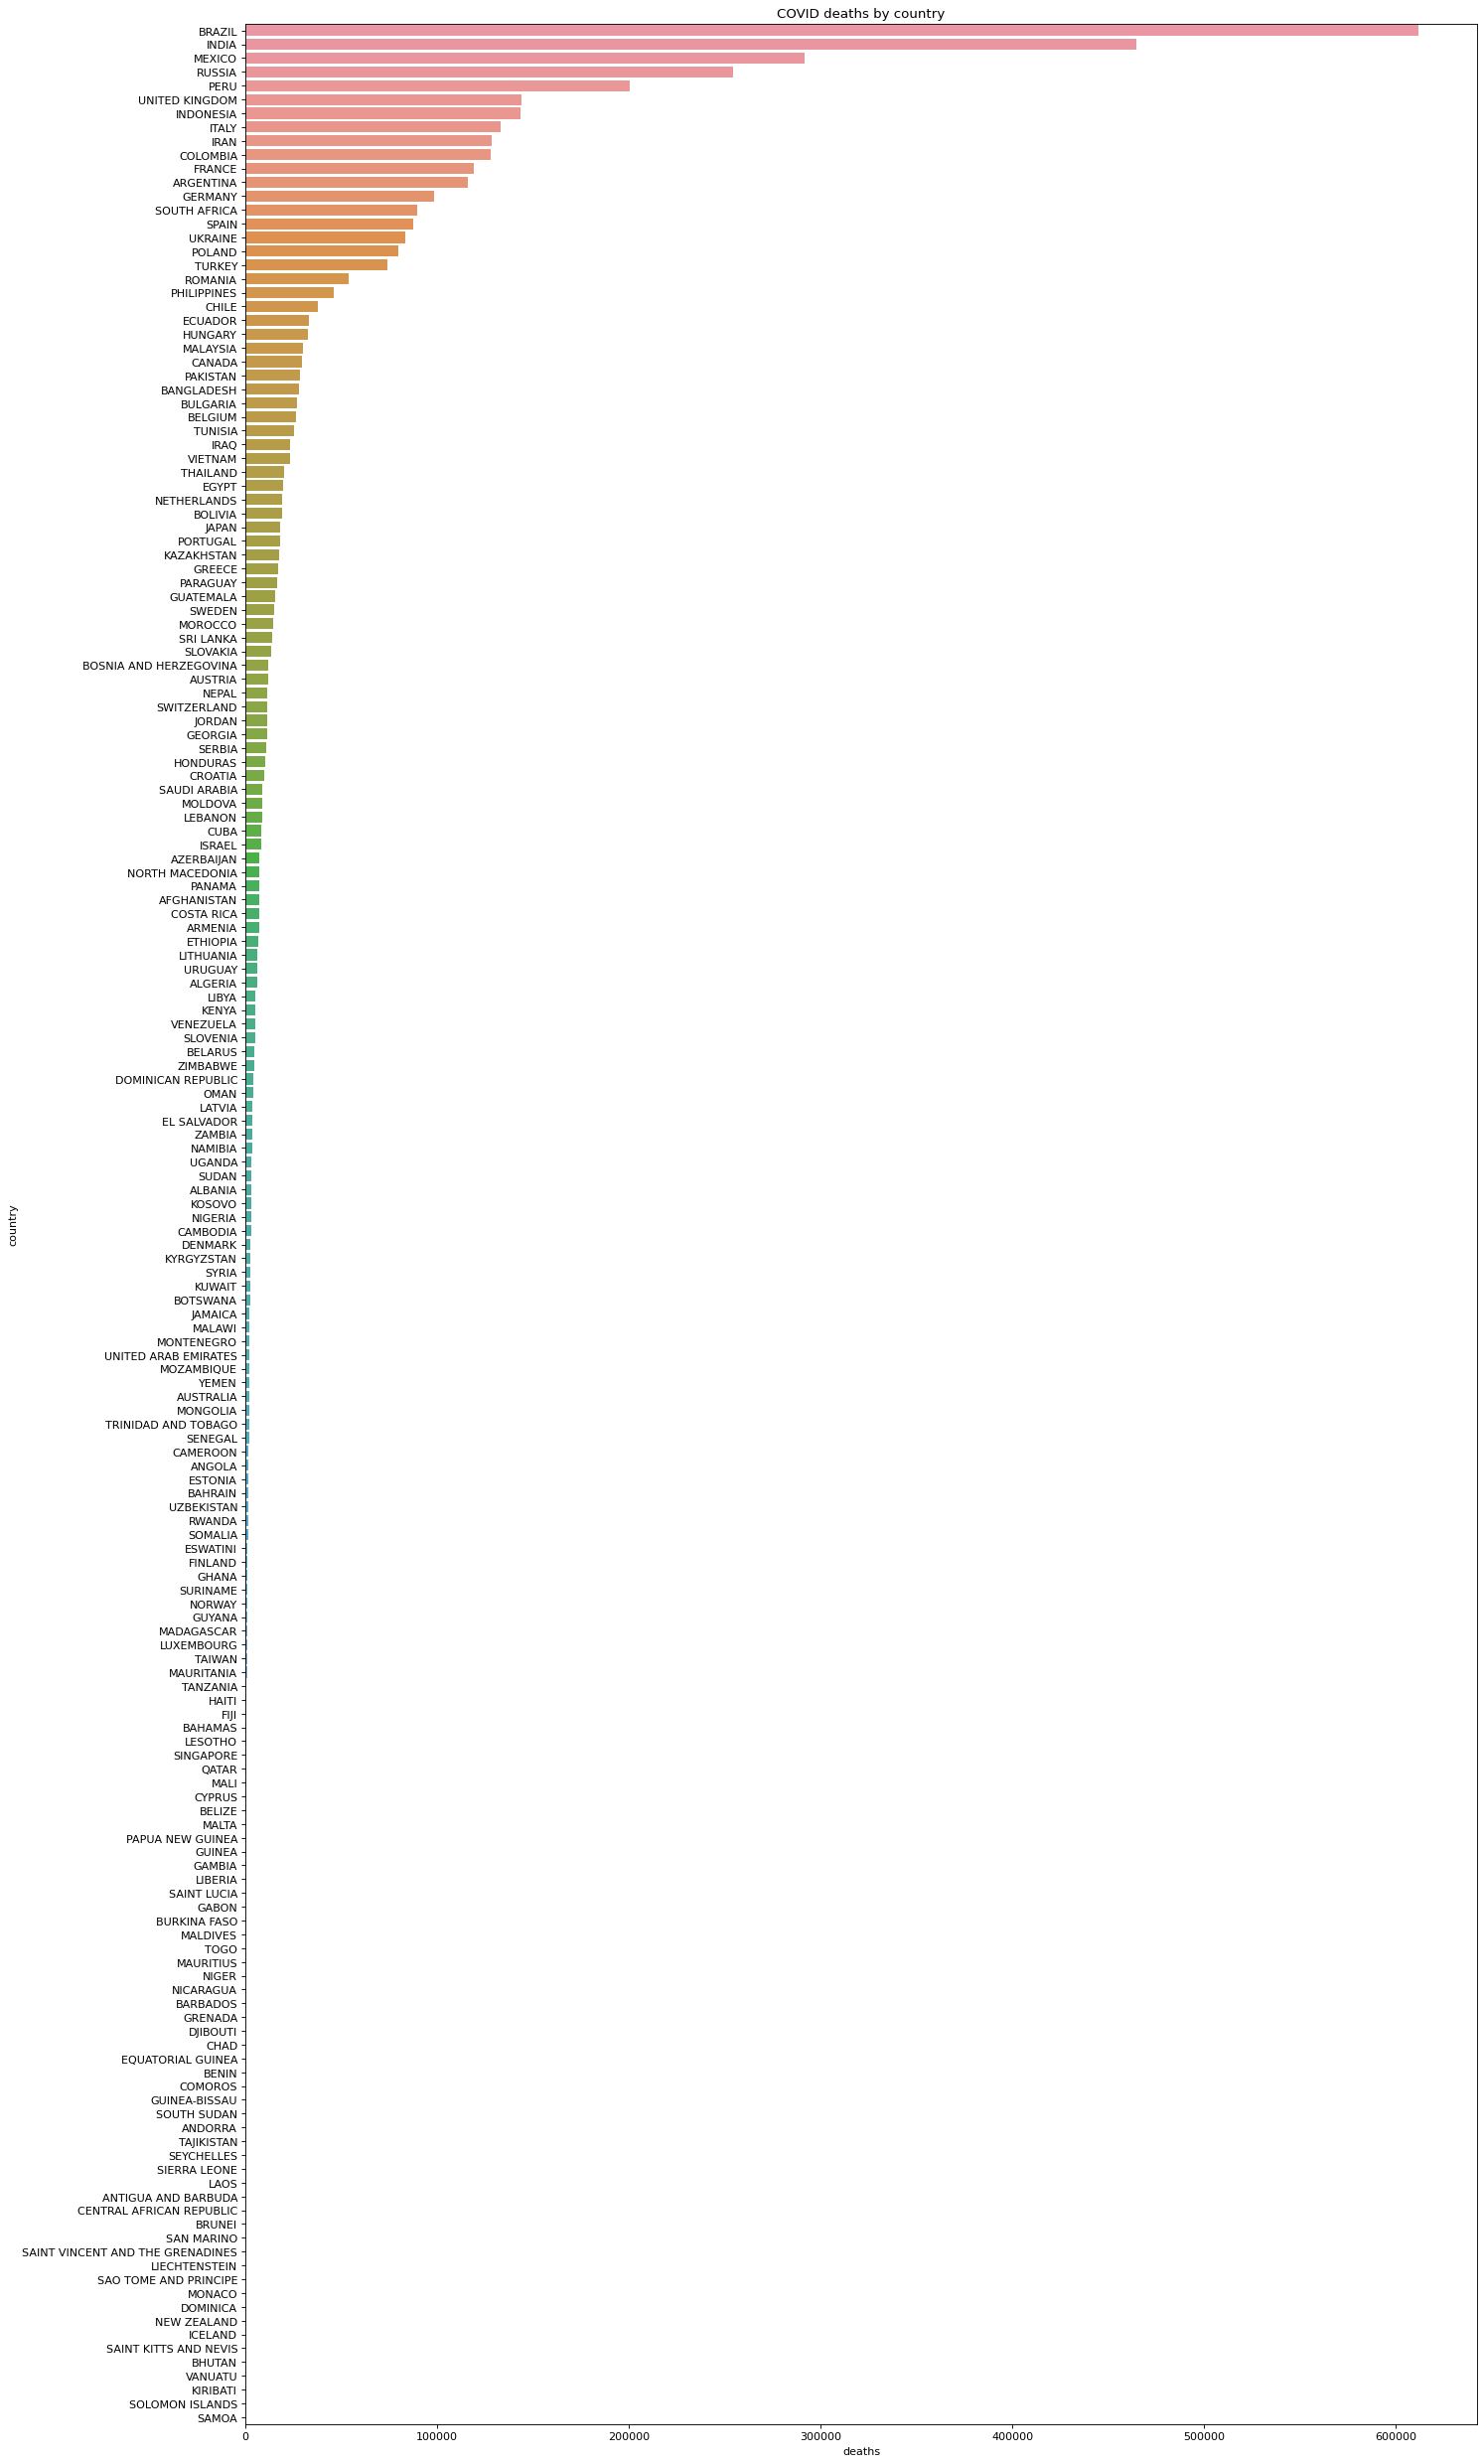

In [125]:
from matplotlib.pyplot import figure
import seaborn as sns

#sort by deaths
df_covid_all.sort_values(by=['deaths'],inplace=True, ascending=False)

#plot
figure(num=None, figsize=(20,40), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x="deaths", y = "country" , data = df_covid_all)
plt.title("COVID deaths by country")
plt.show()

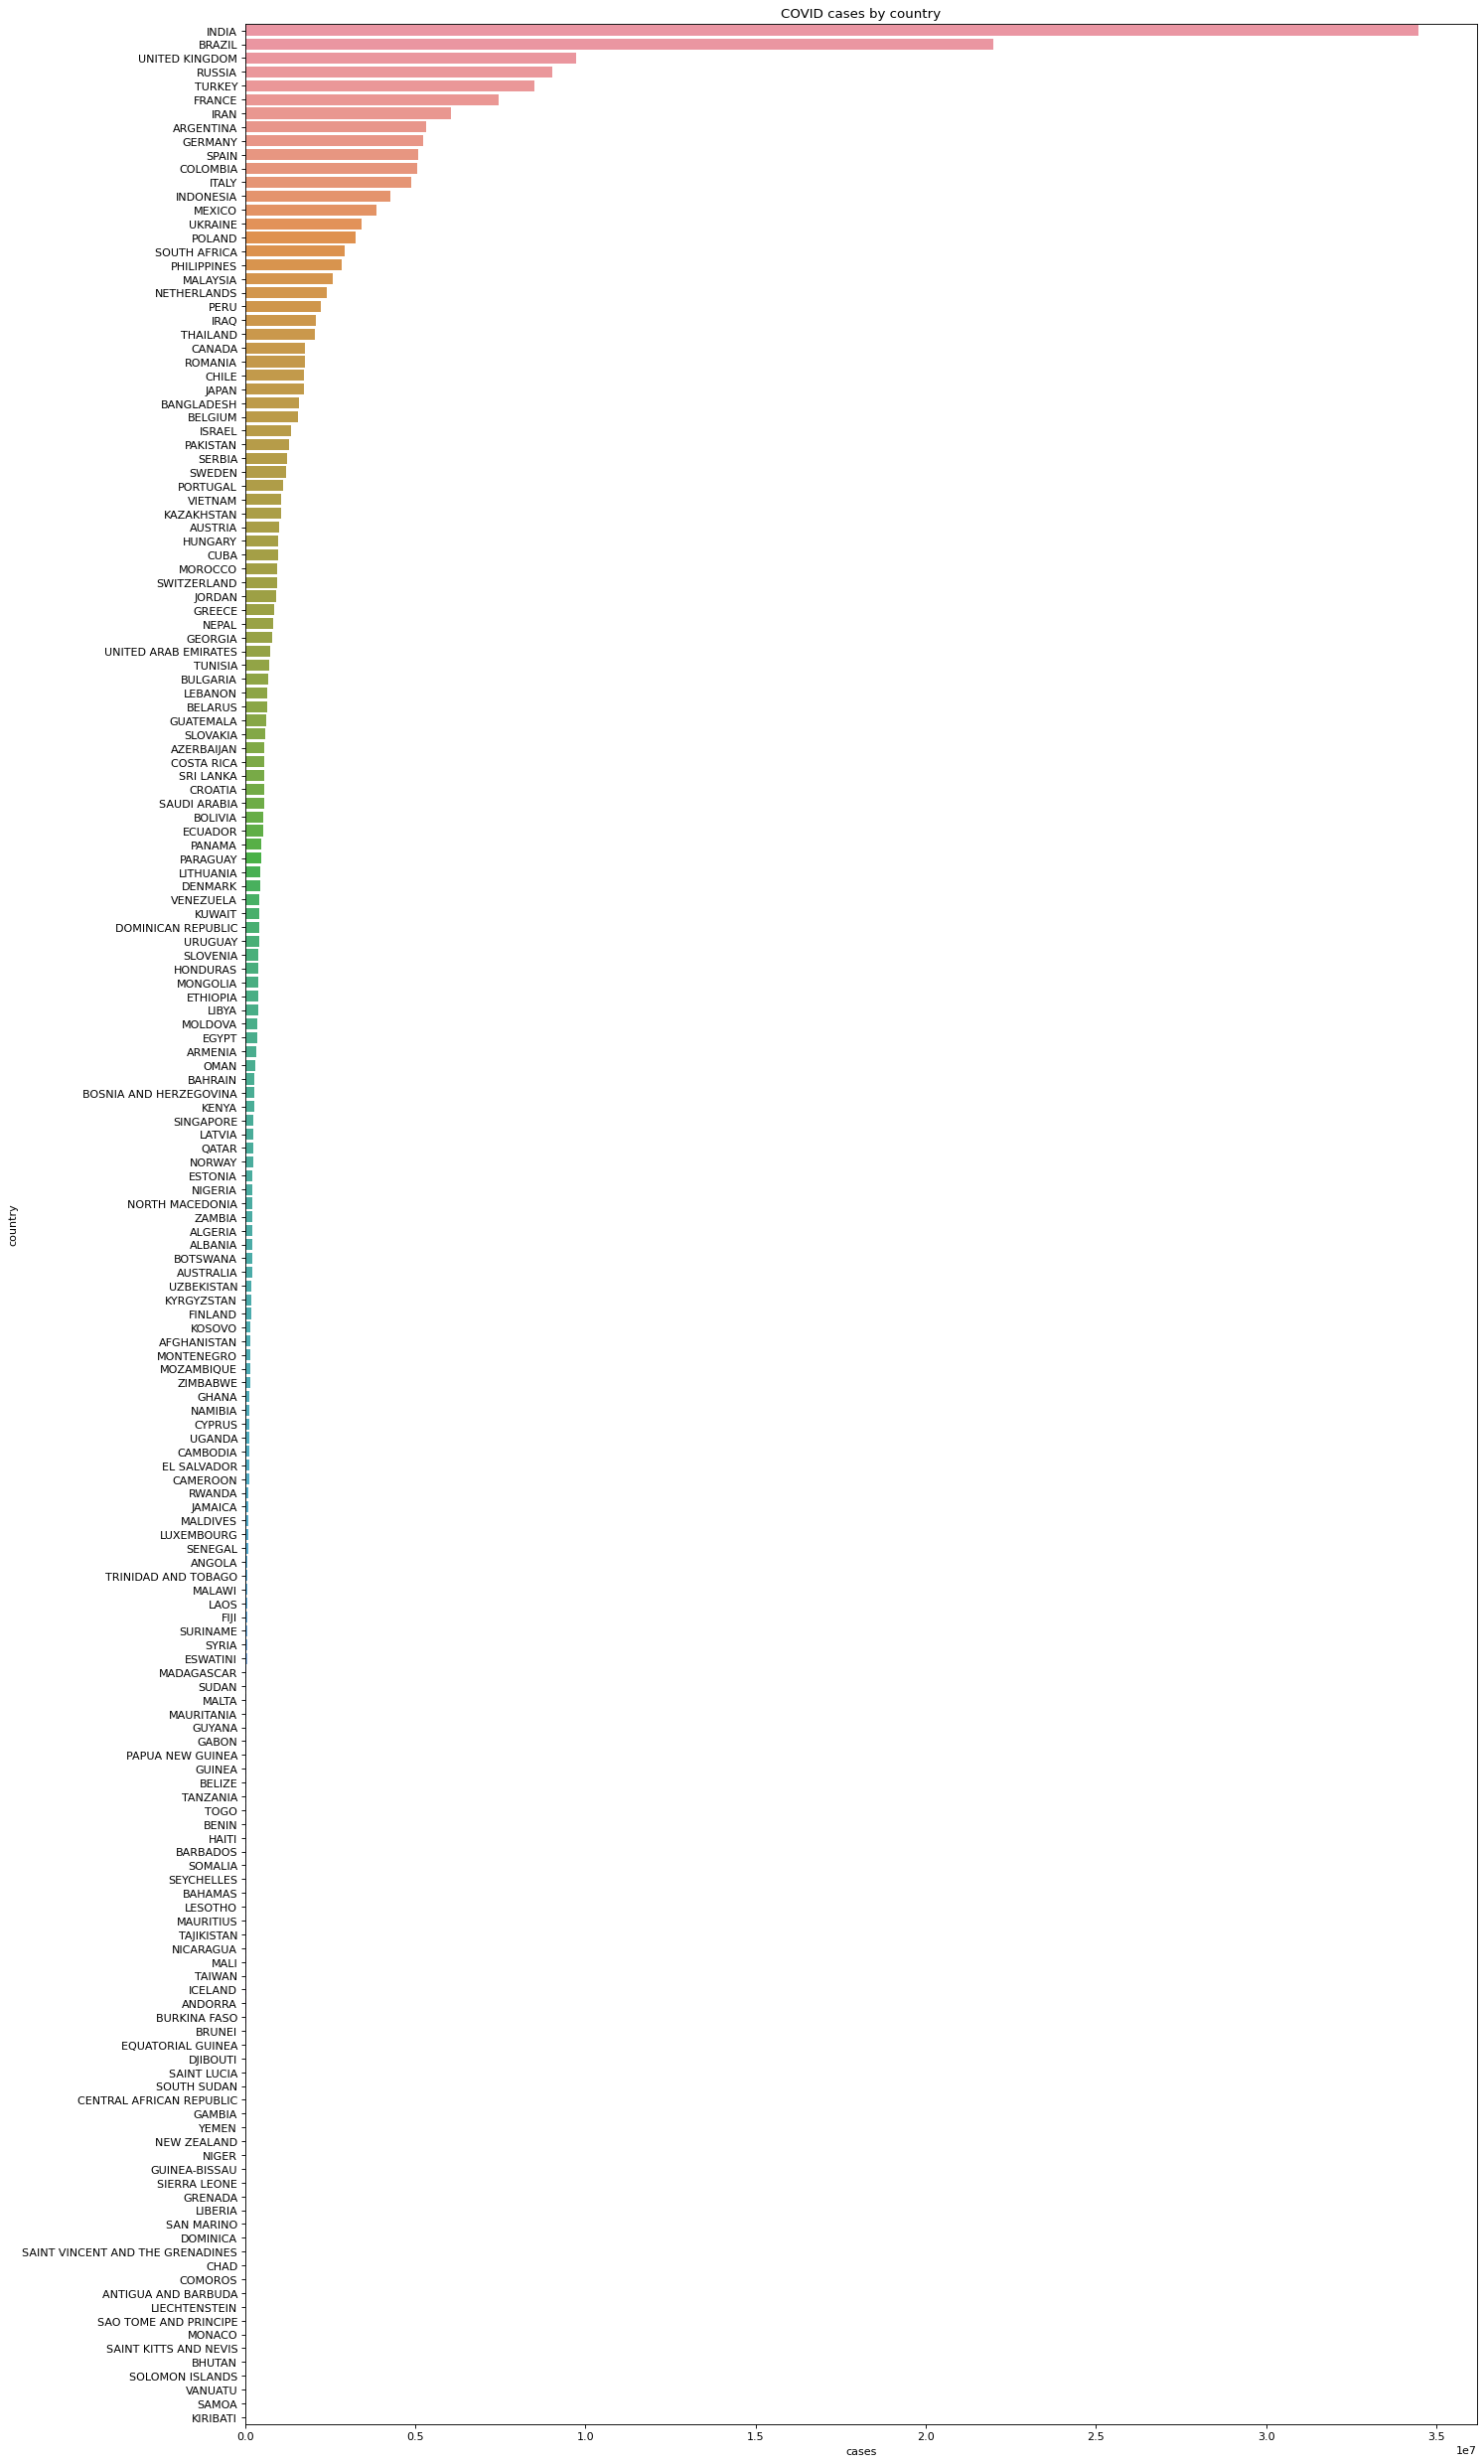

In [126]:
#sort by deaths
df_covid_all.sort_values(by=['cases'],inplace=True, ascending=False)

#plot
figure(num=None, figsize=(20,40), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x="cases", y = "country" , data = df_covid_all)
plt.title("COVID cases by country")
plt.show()

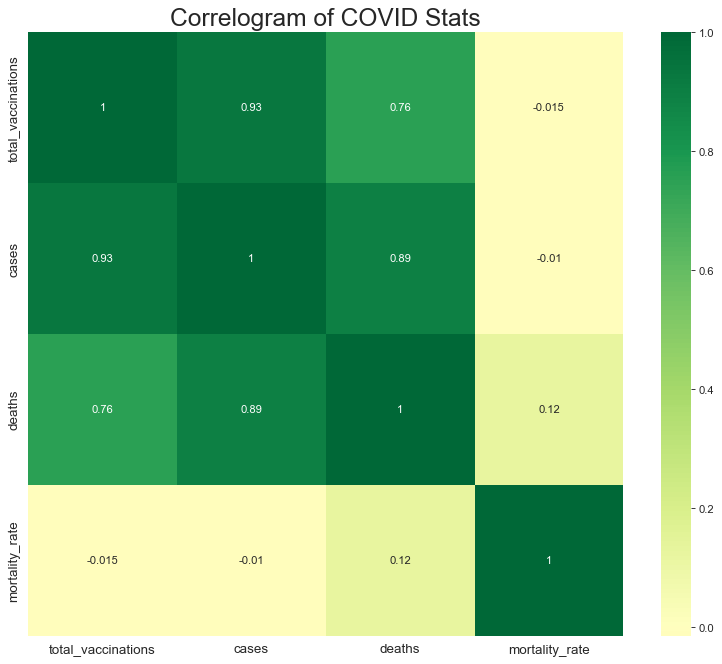

In [131]:
# Plot correlation chart
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_covid_all.corr(), xticklabels=df_covid_all.corr().columns, yticklabels=df_covid_all.corr().columns, cmap='RdYlGn', center=0, annot=True)

# labels and font
plt.title('Correlogram of COVID Stats', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


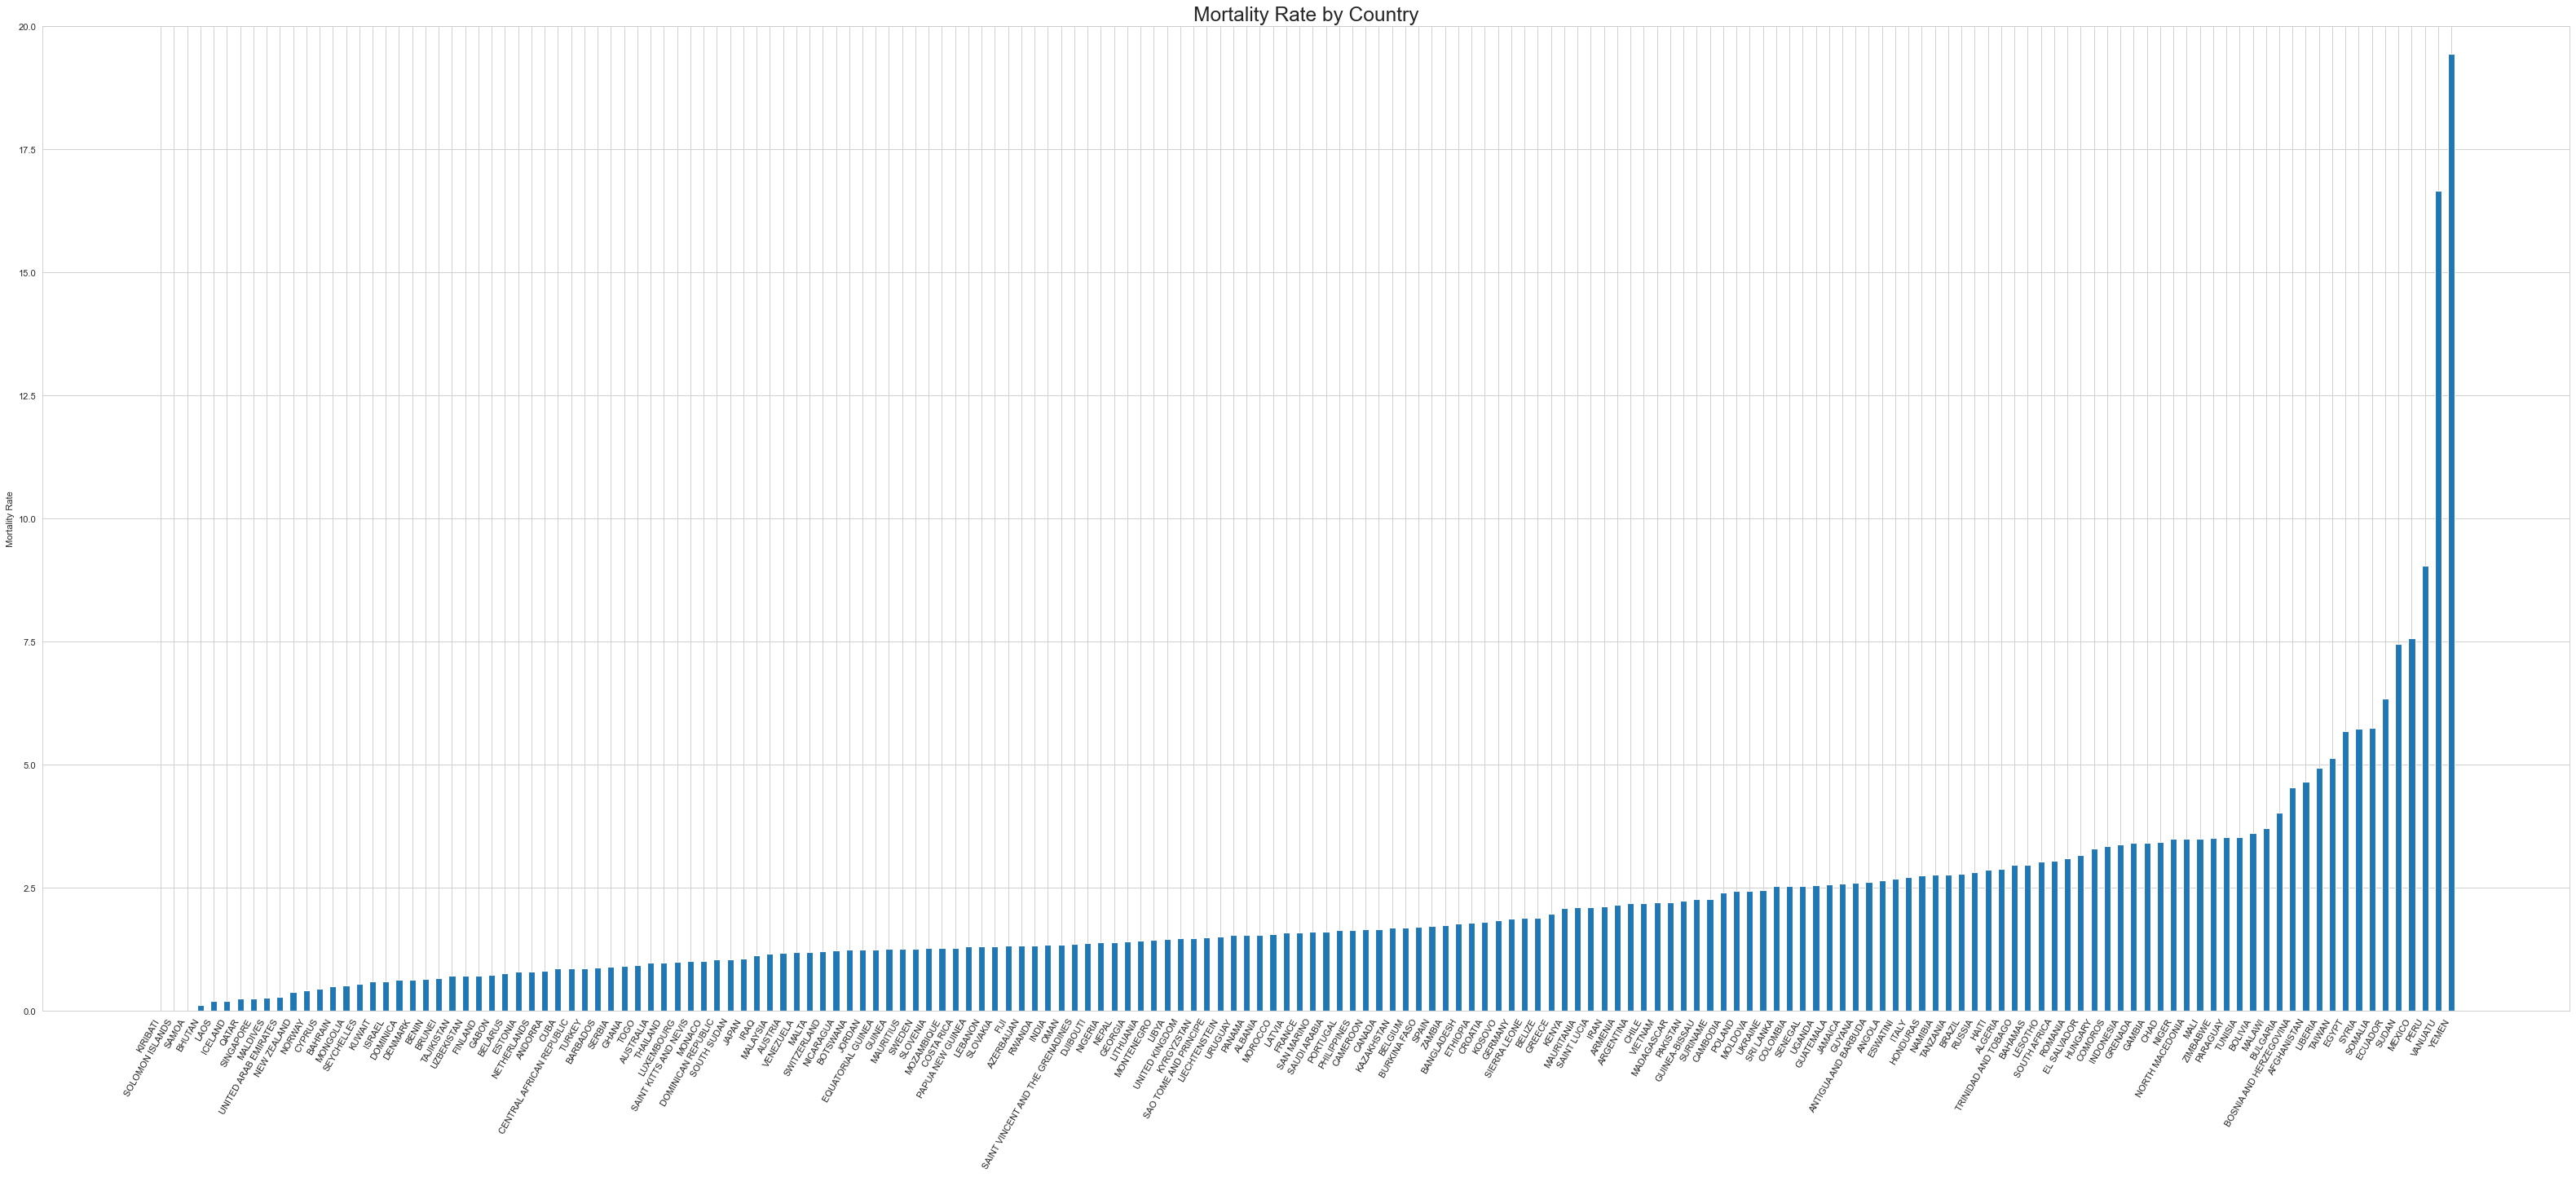

In [193]:
import warnings
warnings.filterwarnings("ignore")

# Prepare Data
df_covid_all.sort_values('mortality_rate', inplace=True)

# Plot Bars
plt.figure(figsize=(50,20), dpi= 80)
plt.bar(df_covid_all['country'], df_covid_all['mortality_rate'], width=.5)


# Decoration
plt.ylabel('Mortality Rate')
plt.gca().set_xticklabels(df_covid_all['country'], rotation=60, horizontalalignment= 'right')
plt.title("Mortality Rate by Country", fontsize=22)

plt.ylim(0, 20)
plt.show()

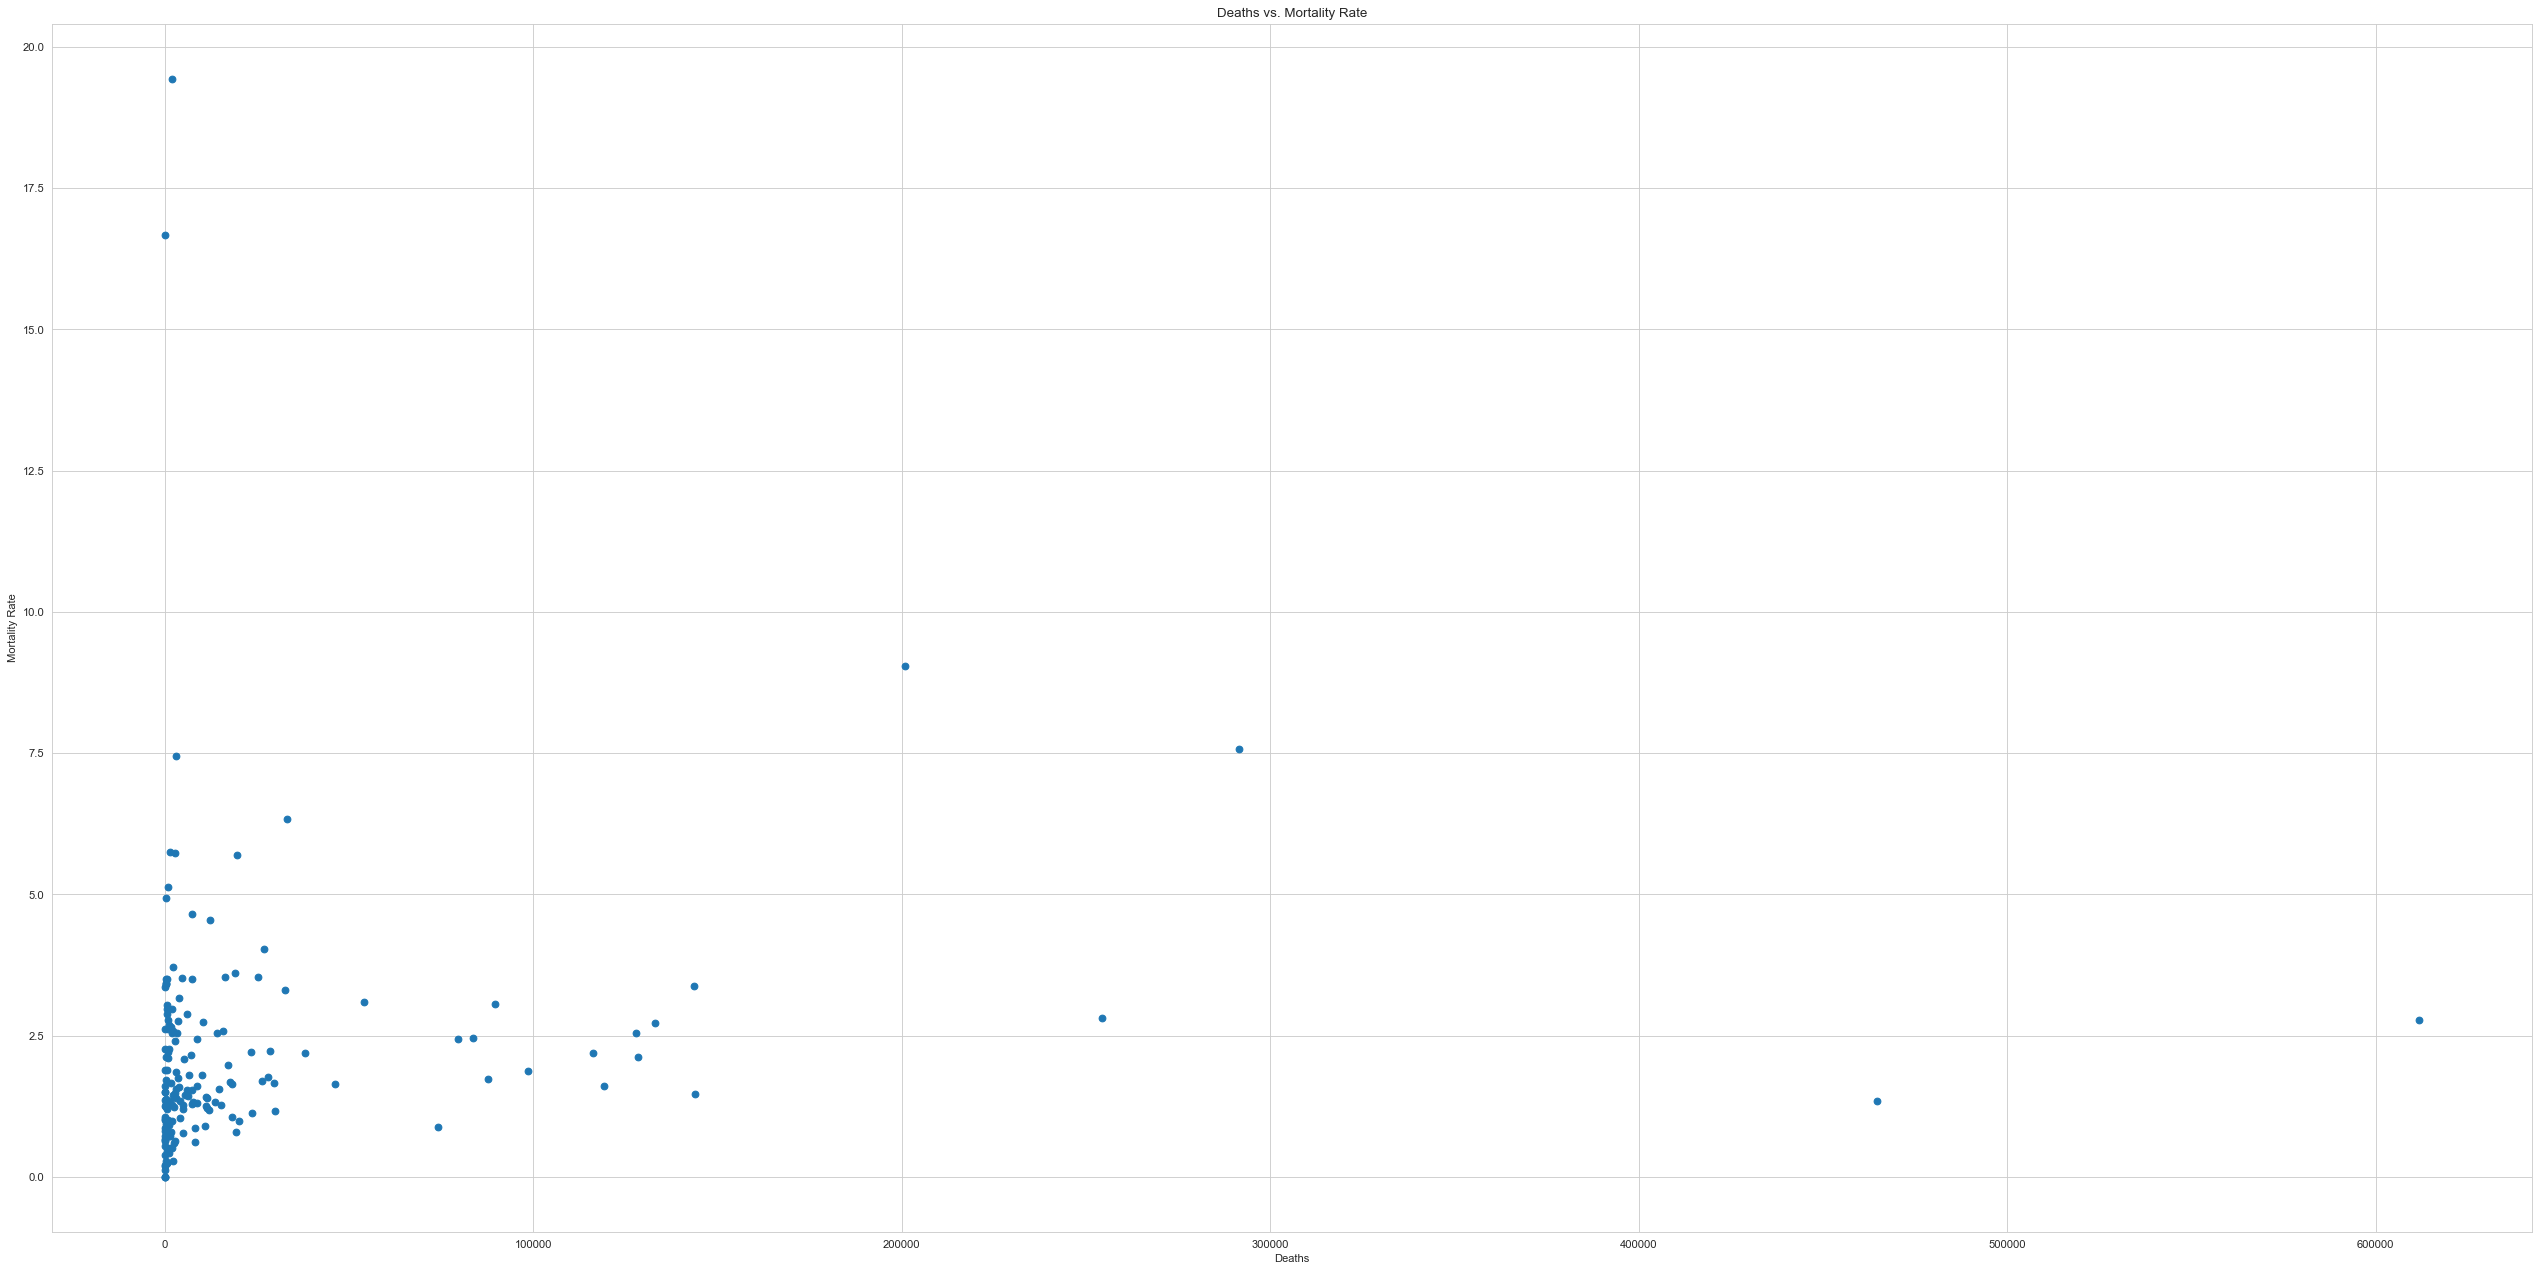

In [195]:
figure(figsize=(40, 20), dpi=80)
plt.scatter(x=df_covid_all['deaths'], y=df_covid_all['mortality_rate'])
plt.title("Deaths vs. Mortality Rate")
plt.ylabel("Mortality Rate")
plt.xlabel("Deaths")
plt.show()

# Summary

Data relating to COVID is both fascinating to work with and requires significant attention by a data scientist to ensure its integrity is maintained.  This project examined COVID related data from a variety of sources and aggregated the data to build a single source of information dataset.  

The flat file information had significant issues with null values and regional information intermixed with nation state information, which required it to be separated.  There were many features to choose from and ultimately the fields with the most complete data was chosen.  The data also had inconsistent start dates which raised the first ethical concern - is the data reporting consistent between all countries?  This could be the start date of reporting for a country but without knowing for sure, the data may be inaccurate and potentially mis-represented if not clarified as the summation of the daily vaccinations was used for the final data set.  Additionally, there were suspicious duplicate values across date ranges.  This may be the daily average of vaccines given over a week but it is highly unlikely the same number of vaccines were given for several days in a row by a country. 

The webpage information and API information was fairly straight forward to work with and the total cases and total deaths were used as part of the final data set. This raised the new ethical concern to highlight - when working with COVID data, the data is constantly refreshed so the timestamp of fetching data can greatly affect the final analysis.   The COVID data is very fluid day to day and having fresh data intermixed with potentially stale data could present a problem.  Consistency and transparency of data collection dates is a key takeaway from this project as it’s important to convey this information to the audience when presenting the data in a final report or dashboard. 

The resulting visualizations were interesting to work with as there were a large number of variables (countries) to work with and data ranges were quite large.  By adjusting the size of the visuals and DPI, the information was able to be displayed in a usable manner.  When compiling the visualizations, it was not lost that obtaining country populations and converting cases and deaths to percentages of the population would have been a more efficient way to visualize the data by normalizing it into more workable ranges.  The populations of the countries are also a critical metric to consider when working with this data and skews the total numbers from a country quite significantly - a large population will likely have larger numbers than a small country.  Scaling the numbers based on population size would have been a more ethical way to display the information, which is perhaps the greatest lesson taken away from this project.